# 深度学习 实验1

本节课我们尝试实现简单的模型——线性回归，线性回归是最简单的模型

$$
\hat y=w\cdot x+b
$$

其中 $w,b$ 是需要训练的参数，在训练前，请以分布 $U(-0.1,0.1)$ 进行随机初始化

损失函数取

$$
L=\frac{1}{2}(\hat y-y)^2
$$

使用随机梯度下降法，在每次迭代中随机取样本 $x,y$，按照下式进行迭代：

$$
w\leftarrow w-\eta\frac{\partial L}{\partial w}
$$
$$
b\leftarrow b-\eta\frac{\partial L}{\partial b}
$$

其中学习率 $\eta$ 请自行调节。

## Task 1

用代码实现线性回归模型，请不要调用 `sklearn` 等机器学习库。

## Task 2

读取数据文件 `train_data.csv` 和 `test_data.csv`，文件中列为 `label` 的表示标签，1 表示正例，0 表示负例，其余列为 $x$，取值均为 0 或 1。使用 `train_data.csv` 训练你的模型，并用 `test_data.csv` 进行测试，计算模型的准确率。

## Task 3

请尝试使用不同的学习率 $\eta$ 进行测试，比较模型的效果，试分析 $\eta$ 的大小对模型效果的影响。

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib 
import matplotlib.pyplot as plt
# matplotlib.rcParams['font.sans-serif']=['SimHei']

In [5]:
df=pd.read_csv('train_data.csv',
#                header=None,
              )
df.head(5)     #看看数据长什么样       

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,label
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


$\color{blue}{\textit Task1 \; Solution:}$

由 $\hat y=w\cdot x+b$ 和 损失函数表达式 $L=\frac{1}{2}(\hat y-y)^2$

**梯度表达式：**

1. $\frac{\partial L}{\partial w_{i}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w_{i}} = (\hat{y}-y)x_{i}$
2. $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial b} = (\hat{y}-y)$

**梯度下降法更新规则为：**


1. $w_{i}\leftarrow w_{i}-\eta\frac{\partial L}{\partial w_{i}}$
2. $b\leftarrow b-\eta\frac{\partial L}{\partial b}$

超参数$\eta$为学习率(Learning Rate)

In [6]:
train_data_label = df.loc[:,'label'] #选中训练数据标签
train_data = df.iloc[:,:100] #选中训练数据

In [7]:
train_data = df.iloc[:,:100]
train_data =np.matrix(train_data.values) 
weight = np.random.uniform(-0.1,0.1,100) #随机初始化权重
weight = weight.reshape(100,1) #转化权重向量维度
bias = np.random.randn(1) #偏置项
print('shape of training data:',train_data.shape)
# print(train_data)
# print(train_data_label.shape)
print('number of labels:',len(train_data_label))

shape of training data: (603, 100)
number of labels: 603


In [8]:
def predict_function(weight,sample,bias):
    # 实现线性回归模型
    pred = np.dot(sample,weight)+bias
    return pred

def compute_loss(weight,sample,truth,bias): 
    #计算单一样本损失
    prediction = predict_function(weight,sample,bias)
    loss = prediction-truth
    return loss

def compute_square_loss(weight,sample,truth,bias): 
    #计算单一样本平方损失
    prediction = predict_function(weight,sample,bias)
    loss = 0.5*(prediction-truth)**2
    return loss

def cal_gradient(weight,train_data,label,bias): 
    #bais和weight都要用到(y^hat-y)，对于bias可以直接使用这个梯度，对于权重向量
    # 还需要乘上对应的样本元素
    grad = compute_loss(weight,train_data,label,bias)
    return grad

def update_weight(weight,gradient,Xi):
    # 更新权重，这里在传入参数时应一个个更新，最后让梯度乘以相应的特征元素即可
    weight = weight - learning_rate * gradient *Xi
    return weight

def update_bias(bias,gradient):
    # 更新偏置项，根据上述数学关系，直接使用梯度即可
    bias = bias - learning_rate * gradient
    return bias

$\color{blue}{\textit Task2 \; Solution:}$

In [9]:
learning_rate = 0.001 #learning rate可以按需求调整

num = len(train_data)
# 这里实现随机梯度下降（SGD）和梯度下降（GD）

# 看看loss的情况，使用梯度下降法进行测试（比较稳定）
training_turns = 15

SGD_training_turns = 1000

for train in range(0,training_turns):# GD
    loss = 0
    #for train in range(0,SGD_training_turns): 随机梯度下降SGD
    #sample=random.randrange(0,num) 随机抽取一个训练样本，把i替换为sample即可
    for i in range(0,num):
        grad=cal_gradient(weight,train_data[i],train_data_label[i],bias)
        bias = update_bias(bias,grad)
        loss += compute_square_loss(weight,train_data[i],train_data_label[i],bias)
        for w in range(len(weight)):
            gradient = np.dot(train_data[i,w],grad)
            weight[w]=update_weight(weight[w],grad,train_data[i,w])
    print('round:',train+1,'square loss:',loss)

round: 1 square loss: [[97.08523383]]
round: 2 square loss: [[23.56208886]]
round: 3 square loss: [[16.98626678]]
round: 4 square loss: [[14.67924379]]
round: 5 square loss: [[13.25461467]]
round: 6 square loss: [[12.25131934]]
round: 7 square loss: [[11.50177283]]
round: 8 square loss: [[10.91558354]]
round: 9 square loss: [[10.43966105]]
round: 10 square loss: [[10.04164181]]
round: 11 square loss: [[9.70109573]]
round: 12 square loss: [[9.40462959]]
round: 13 square loss: [[9.14310759]]
round: 14 square loss: [[8.91004617]]
round: 15 square loss: [[8.70066904]]


可以看到均方误差在不断减小，表示随着梯度下降算法的运行，模型正在慢慢收敛。

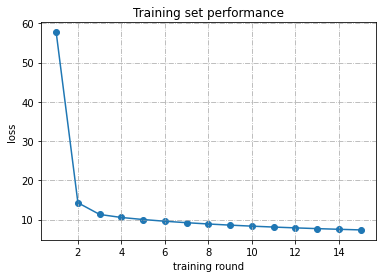

In [10]:
# 查看收敛情况
def loss_plot():
    x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    y=[57.74,14.29,11.31,10.54,10.02,9.58,9.21,8.88,8.59,8.33,8.10,7.89,7.70,7.53,7.37]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.title('Training set performance')
    plt.grid(linestyle='-.')
    plt.xlabel('training round')
    plt.ylabel('loss')
    plt.show()
    
loss_plot()

可以看到，我们的模型训练了15轮以后基本收敛了

In [11]:
print(bias) #检查一下数值是不是正确

[[0.27447848]]


In [14]:
print(np.dot(weight.T,weight))

[[0.43787553]]


$\color{blue}{\Large 观察:}$ 这里其实可以发现，对目标函数 $\hat y=w\cdot x+b$ 的数值而言，主要的贡献是偏置项 $bias$，而与权重相关的部分 $w\cdot x$ 对函数值本身的影响比较小，主要起到微调决策边界的作用。我在这个地方尝试了去掉 $bias$ 项，使用梯度下降方法进行多轮训练，结果远不如有偏置项（至少无法使用0.5作为简单的决策边界）。偏置项 $bias$ 的主要作用是让这个线性模型在向量空间中能有更多不同权重组合让损失函数最小化的可能性，而非使超平面必须通过原点。

In [148]:
def get_acc(weight,sample,bias): #这个函数用来预测，决策边界设置为0.5
    pred = np.dot(sample,weight)+bias
    #print(pred)
    if pred > 0.5:
        return 1
    else:
        return 0

In [149]:
count = 0
for i in range(0,num):
    if get_acc(weight,train_data[i],bias) == train_data_label[i]:
        #print(get_acc(weight,X[i],bias),y[i])
        count+=1
        
print('training set correct:',count)

print('training set accuracy:',count/num)

training set correct: 601
training set accuracy: 0.9966832504145937


训练集准确率还不错，模型已经收敛，但是模型的性能评判还是要取决于测试集，所以接下来我们看一下测试集的准确率

In [150]:
df2=pd.read_csv('test_data.csv',
#                header=None,
               )
df2.head(5)    

test_data_label = df2.loc[:,'label']
test_data = df2.iloc[:,:100]
test_data = np.matrix(test_data.values)

In [151]:
count = 0
print('test data total:',len(test_data_label))
for t in range(0,len(test_data_label)):
    if get_acc(weight,test_data[t],bias) == test_data_label[t]:
        #print(get_acc(weight,X[i],bias),y[i])
        count+=1
        
print('test data correct:',count)
print('test data accuray:',count/len(test_data_label))

test data total: 258
test data correct: 257
test data accuray: 0.9961240310077519


尝试了更多轮训练，发现257/258应该是这个线性分类器最好的性能了

$\color{blue}{\textit Task3 \; Solution:}$

讨论学习率 $\eta$ 对模型表现的影响，用梯度下降方法进行测试（使用梯度下降法跑所有数据，减少一点随机性，方便总结，一共训练15轮）

In [81]:
train_data = df.iloc[:,:100]
train_data =np.matrix(train_data.values) 
weight = np.random.uniform(-0.1,0.1,100) #随机初始化权重
weight = weight.reshape(100,1) #转化权重向量维度
bias = np.random.randn(1) #偏置项
bias = bias.astype(float)
print('shape of training data:',train_data.shape)
# print(train_data)
# print(train_data_label.shape)
print('number of labels:',len(train_data_label))

num = len(train_data)

learning_rate = 0.01 #这里调整学习率
# learning_rate = input('input learning rate:')

for train in range(0,15):
    for i in range(0,num):
        grad=cal_gradient(weight,train_data[i],train_data_label[i],bias)
        bias=update_bias(bias,grad)
        for w in range(len(weight)):
            gradient = np.dot(train_data[i,w],grad) 
            weight[w]=update_weight(weight[w],grad,train_data[i,w])

train_correct_count = 0
for i in range(0,num):
    if get_acc(weight,train_data[i],bias) == train_data_label[i]:
        #print(get_acc(weight,X[i],bias),y[i])
        train_correct_count+=1
        
print('learning rate:',learning_rate)        
        
print('training set correct:',train_correct_count)
print('training set accuracy:',train_correct_count/num) 

test_correct_count = 0
print('test data total:',len(test_data_label))
for t in range(0,len(test_data_label)):
    if get_acc(weight,test_data[t],bias) == test_data_label[t]:
        #print(get_acc(weight,X[i],bias),y[i])
        test_correct_count+=1
        
print('test data correct:',test_correct_count)
print('test data accuray:',test_correct_count/len(test_data_label))

shape of training data: (603, 100)
number of labels: 603
learning rate: 0.01
training set correct: 603
training set accuracy: 1.0
test data total: 258
test data correct: 255
test data accuray: 0.9883720930232558


这里总结了一下分别选取相同轮次下，learning rate为：0.01，0.05，0.1，0.15，0.2，0.25，0.3时模型在测试集和训练集的准确率表现。如下所示：


| 学习率 | 0.01 | 0.05 | 0.1 | 0.15 | 0.2 | 0.25 | 0.3 |
| :----------: | :--------: | :----------: | :----------: | :----------: | :----------: | :----------: | :----------: |
| 训练集准确率 | 0.998 | 0.998 | 0.990 | 0.80 | 0.80 | 0.421 | 0.410
| 测试集准确率| 0.992 | 0.988 | 0.984 | 0.776 | 0.786 | 0.496 | 0.492

依托这些数据做个简单的可视化，看看学习率对模型精确度的影响

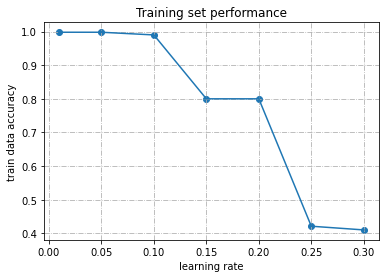

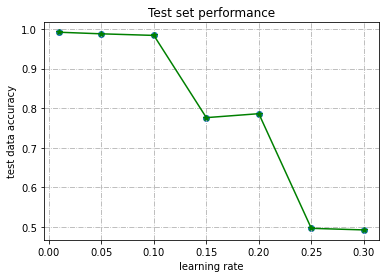

In [156]:
# 训练集表现
def train_data_accuracy_plot():
    x=[0.01,0.05,0.1,0.15,0.2,0.25,0.3]
    y=[0.998,0.998,0.990,0.80,0.80,0.421,0.410]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.title('Training set performance')
    plt.grid(linestyle='-.')
    plt.xlabel('learning rate')
    plt.ylabel('train data accuracy')
    plt.show()
    
# 测试集表现
def test_data_accuracy_plot():
    x=[0.01,0.05,0.1,0.15,0.2,0.25,0.3]
    y=[0.992,0.988,0.984,0.776,0.786,0.496,0.492]
    plt.plot(x,y,'g*-')
    plt.scatter(x,y)
    plt.title('Test set performance')
    plt.grid(linestyle='-.')
    plt.xlabel('learning rate')
    plt.ylabel('test data accuracy')
    plt.show()

train_data_accuracy_plot()    
test_data_accuracy_plot()

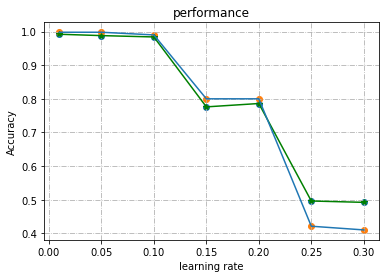

In [160]:
def comparison_plot():
    x=[0.01,0.05,0.1,0.15,0.2,0.25,0.3]
    y_test=[0.992,0.988,0.984,0.776,0.786,0.496,0.492]
    y_train=[0.998,0.998,0.990,0.80,0.80,0.421,0.410]
    plt.plot(x,y_test,'g*-')
    plt.plot(x,y_train)
    plt.scatter(x,y_test)
    plt.scatter(x,y_train)
    plt.title('performance')
    plt.grid(linestyle='-.')
    plt.xlabel('learning rate')
    plt.ylabel('Accuracy')
    plt.show()
comparison_plot()

可以看到，对于这个比较简单的数据集而言，小步长在足够的训练轮次下可以表现的很好，而放大步长会明显导致模型无法收敛/来回震荡，这在测试集和训练集表现相似，没有发生严重的过拟合现象。

除此之外，权重初始值分布也对模型的收敛速度和最终达到的精度有影响，$U(-0.1,0.1)$ 的初始分布比较好，稍大一些的均匀分布区间或是正态分布初始化略差一点，比如$U(-1,1)$或$N(-1,1)$的表现不如$U(-0.1,0.1)$，但是从测试集准确率而言影响幅度不大，最终性能只会差两三个测试样本的正确性。

**End of Experiment1**